<a href="https://colab.research.google.com/github/JordiPG05/Scraping/blob/main/Radar_Pro_LOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installs

In [1]:
pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.2 MB/s 


### Notebook

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import datetime

In [3]:
df = pd.read_csv('https://oracleselixir-downloadable-match-data.s3-us-west-2.amazonaws.com/2022_LoL_esports_match_data_from_OraclesElixir_20221102.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,top,Soboro,oe:player:38e0af7278d6769d0c81d7c4b47ac1e,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,3,2,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15768.0,552.2942,0.278784,1072.3993,777.7933,8.0,0.2802,6.0,0.2102,5.0,26.0,0.9107,10934,7164.0,250.9282,0.253859,10275.0,NaN,231.0,220.0,11.0,NaN,NaN,8.0911,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,jng,Raptor,oe:player:637ed20b1e41be1c51bd1a4cb211357,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,5,6,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11765.0,412.0841,0.208009,944.2732,650.1576,6.0,0.2102,18.0,0.6305,6.0,48.0,1.6813,9138,5368.0,188.0210,0.190220,8750.0,NaN,148.0,33.0,115.0,NaN,NaN,5.1839,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,mid,Feisty,oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,2,3,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14258.0,499.4046,0.252086,581.6462,227.7758,19.0,0.6655,7.0,0.2452,7.0,29.0,1.0158,9715,5945.0,208.2312,0.210665,8725.0,NaN,193.0,177.0,16.0,NaN,NaN,6.7601,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,bot,Gamin,oe:player:998b3e49b01ecc41eacc392477a98cf,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,4,2,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

## Radar


In [5]:
def filtrar_datos(df,league,year,game,fecha):
  #Selección de los datos
  df['Late ratio']=(df['earned gpm']*0.4 +df['damagetochampions']*0.3+df['damagemitigatedperminute']*0.1+df['kills']*0.15+df['assists']*0.05-df['deaths']*0.15)
  df['Early ratio']=(df['goldat10']*0.4 +df['xpat10']*0.4+df['killsat10']*0.15+df['assistsat10']*0.05-df['deathsat10']*0.15+df['golddiffat10']*0.10+df['xpdiffat10']*0.05)
  df['MID ratio']=(df['goldat15']*0.4 +df['xpat15']*0.4+df['killsat15']*0.15+df['assistsat15']*0.05-df['deathsat15']*0.15+df['golddiffat15']*0.10+df['xpdiffat15']*0.05)

  df_EM=df[df['league']==league]
  df_EM=df_EM[df_EM['year']==year]
  df_EM['date'] = pd.to_datetime(df_EM['date'],format='%Y-%m-%d')
  filtered_df = df_EM.loc[df_EM['date'] >= fecha]
  filtered_df = filtered_df.loc[filtered_df['game'] >= game] 
  return filtered_df

In [6]:
filtered_df=filtrar_datos(df,'WCS',2022,1,'2022-10-29')
df_maximos=filtered_df.groupby(['playername']).max()

In [7]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [9]:
# parameter names of the statistics we want to show
params = ['cspm','dpm','kills','assists','deaths','earned gpm','damagetochampions']

high = []
low = []

for i in params:
  high.append(df_maximos[i].max())
  low.append(df_maximos[i].min())


# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['deaths']

In [11]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [12]:
jugador1=input('Jugador 1:')
game1=int(input('Selecciona el nº de juego:'))
player1=filtered_df[filtered_df['playername']==jugador1]
player1=player1[player1['game']==game1]
player1.reset_index(drop=True, inplace=True)
player1_list = []
for i in params:
  player1_list.append(player1[i][0])

Jugador 1:Faker
Selecciona el nº de juego:3


In [14]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

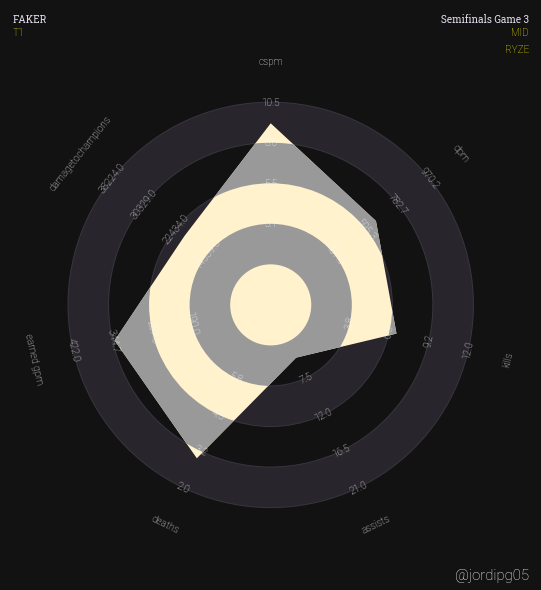

In [98]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=8, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1)
radar_output = radar.draw_radar(player1_list, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#fff2cc'},
                                kwargs_rings={'facecolor': '#999999'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, '@jordipg05',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, player1['playername'][0].upper(), fontsize=200,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, player1['teamname'][0], fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#fff900')
title3_text = axs['title'].text(0.99, 0.65, 'Semifinals Game 3', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, player1['position'][0].upper(), fontsize=30,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#fff900')
title5_text = axs['title'].text(0.99, -0.25, player1['champion'][0].upper(), fontsize=150,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#fff900')

fig.set_facecolor('#121212')

## Pizza Plot


In [16]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [17]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [36]:
from PIL import Image
import requests
url = "https://img3.freepng.es/dy/35d7c6ec201204cb31be31eb2feaaf1e/L0KzQYm3VcI4N6RqgZH0aYP2gLBuTfZic5Z3Rd5uYXf4dX72hr1tbZhqhtZ8LYfygr3rTfNpaZ51gdH3c3jsgH76i711bZ1qRadrMHG5dLSCgvJna2o9RqYDMkK3RIq7UcUzP2U2SKM7MUe6PsH1h5==/kisspng-faker-league-of-legends-world-championship-sk-tele-5b0a6dc9bbfc98.48224494152741012177.png"
im = Image.open(requests.get(url, stream=True).raw)

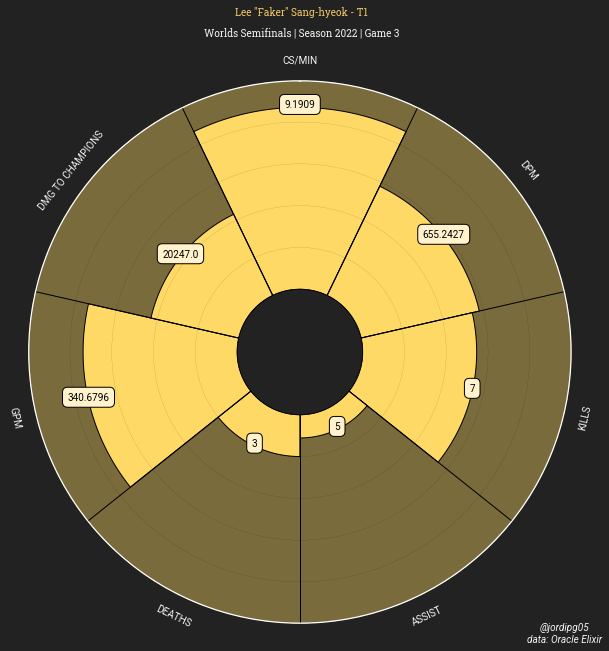

In [93]:
# instantiate PyPizza class
params1 = ['CS/MIN','DPM','KILLS','ASSIST','DEATHS','GPM','DMG TO CHAMPIONS']
baker = PyPizza(
    params=params1,
    min_range=low,        # min range values
    max_range=high,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#ffffff", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0.1, other_circle_color="#000000", inner_circle_size=30,
)

# plot pizza
fig, ax = baker.make_pizza(
    player1_list,                     # list of values
    figsize=(10, 10),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#ffd966", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=20, zorder=5,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=250,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#fff2cc",
            boxstyle="round,pad=0.5", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, 'Lee "Faker" Sang-hyeok - T1', size=150,
    ha="center", fontproperties=font_bold.prop, color="#F2C766"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Worlds Semifinals | Season 2022 | Game 3",
    size=60,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "@jordipg05"
CREDIT_2 = "data: Oracle Elixir"

fig.text(
    0.88, 0.1, f"{CREDIT_1}\n{CREDIT_2}", size=20,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="center"
)


plt.show()